### 교차검증을 간단하게 하는 방법
- 프로세스(폴드 설정 -> 루프반복을 통해서 하습 및 테스트의 인덱스 추출 -> 학습과 예측)
- cross_val_score(예측모델, 피처세트, 레이블, 성능평가 지표, 폴드 수)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [5]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data = iris_data.data
label = iris_data.target

In [8]:
dt_clf = DecisionTreeClassifier(random_state=100)

# 성능평가지표는 acc, 교차검증 5개
scores = cross_val_score(dt_clf,data,label,cv=5,scoring="accuracy")
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [13]:
import numpy as np
print('평균 검증 정화도',np.round(np.mean(scores),3))

평균 검증 정화도 0.953


In [15]:
scores = cross_validate(dt_clf,data,label,cv=5,scoring="accuracy")
scores

{'fit_time': array([0.00131702, 0.00110531, 0.00100708, 0.00099659, 0.00100493]),
 'score_time': array([0.00036263, 0.00033021, 0.00032616, 0.00027609, 0.00029063]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

### 교차검증과 하이퍼파라미터를 한 번에 할 수 있는 함수
- GridSearchCV

In [ ]:
# graphviz
# http://www.npackd.org/p/org.graphviz.Graphviz/2.38
# pip install graphviz

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 샘플 데이터 생성
grp01 = np.array([0.3,0.4,0.3])
grp02 = np.array([0.7,0.2,0.1])
grp03 = np.array([0.01,0.01,0.98])

In [ ]:
from IPython.display import Image
Image('C:/img/entropy.png',width=700)

In [25]:
def entropy(x) :
    return (-x*np.log2(x).sum())

In [26]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

TypeError: only size-1 arrays can be converted to Python scalars

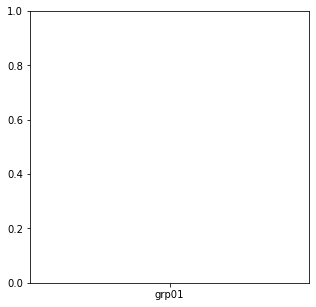

In [29]:
plt.figure(figsize=(5,5))
plt.bar(['grp01','grp02','grp03'],[e01,e02,e03])
plt.show()
plt.close()

In [30]:
import graphviz

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [42]:
dt_clf = DecisionTreeClassifier(random_state=100, criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=100)

In [43]:
# 학습 fit
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,
               out_file='iris_tree.dot',
               class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,
               impurity=True,
               filled=True)

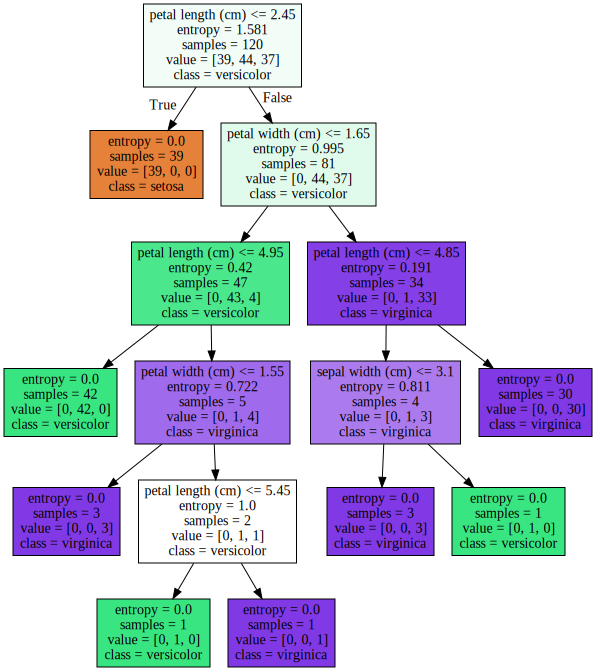

In [45]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'


with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# ---> 하이퍼 파라미터 튜닝을 안해서 트리의 깊이 제한이 없다
# ---> 그래서 training은 잘 되지만 overfitting

- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수(과적합 제어)
- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 수(과적합 제어) 
- max_features : 피처의 최대 갯수
- max_depth : 트리의 최대 높이
- max_leaf.nodes : 리프노드의 최대 갯수

depth 3개로 제한해보기

In [46]:
dt_clf = DecisionTreeClassifier(random_state=100, criterion='entropy', max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=100)
# 학습 fit
dt_clf.fit(X_train, y_train)

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,
               out_file='iris_tree.dot',
               class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,
               impurity=True,
               filled=True)

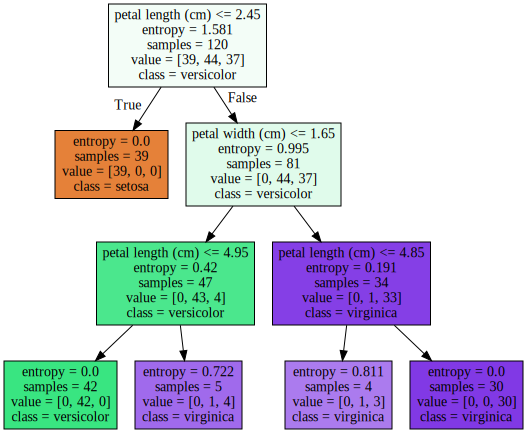

In [51]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'


with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

## GridSearchCV

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

- estimator : 분류기(알고리즘)
- param_grid : {param : value, param : value}
- scoring : 평가방법을 지정
- refit : True(최적의 하이퍼 파라미터를 찾는 재학습)

In [ ]:
# grid_parameter = {'max_depth' : [1,2,3],
#                 'min_samples_split' : [2,3]}
# pd.read_csv('Grid.csv', index_col="순번")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                    random_state=100)
dt_clf = DecisionTreeClassifier(random_state=100)

grid_parameter = {'max_depth' : [1,2,3],
                 'min_samples_split' : [2,3]}

In [56]:
dt_searchCV = GridSearchCV(dt_clf,
                          param_grid = grid_parameter,
                          cv = 3,
                          refit=True)
dt_searchCV = { 'max_depth' : [1,2,3],
               'min_samples_split' : [2,3]
}

In [58]:
dt_searchCV.cv_results_

AttributeError: 'dict' object has no attribute 'cv_results'

In [ ]:
scoreDF = pd.DataFrmae(dt_searchCV.cv_results_)
scoreDF